<a href="https://colab.research.google.com/github/varnit836/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone project/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##Data Cleaning

In [5]:
# creating copy of data
df = netflix.copy()

In [6]:
# shape of data
print('No. of rows :',df.shape[0])
print('No. of Columns :',df.shape[1])

No. of rows : 7787
No. of Columns : 12


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
#checking duplicate values
df.duplicated().sum()

0

In [9]:
# checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Dealing with null values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Droping some columns too
df.dropna(subset=['date_added','rating'],inplace=True)

Since director have many null values if we drop them, we loss a lot data so, we replacing them with unknown.

In [11]:
# checking null value again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


#Exploratory Data Analysis

##TV shows and Movies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


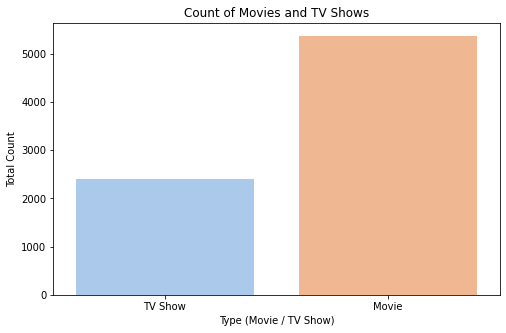

In [13]:
# count plot for TV shows and Movies
plt.figure(figsize=(8,5))
g = sns.countplot(df.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie / TV Show)")
plt.ylabel("Total Count")
plt.show()

In [14]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

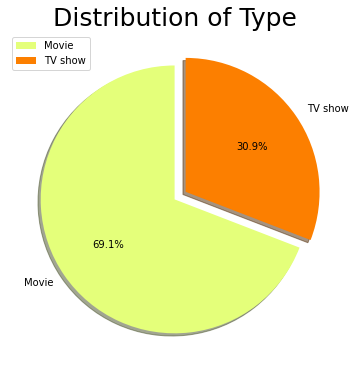

In [15]:
# pie chart for movie and tv show
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (6, 7)
plt.pie(size,labels=labels, colors = colors,autopct='%1.1f%%', explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

**It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.**

##Rating of shows and movies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

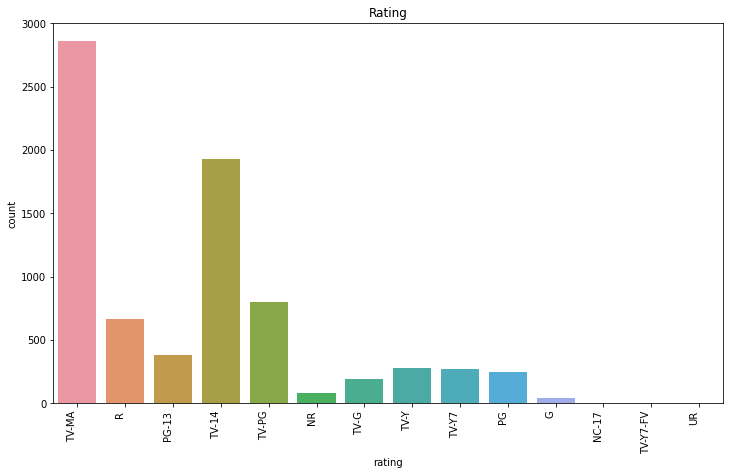

In [16]:
# count plot for ratings
sns.countplot(df['rating'])
sns.countplot(df['rating']).set_xticklabels(sns.countplot(df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.title('Rating')

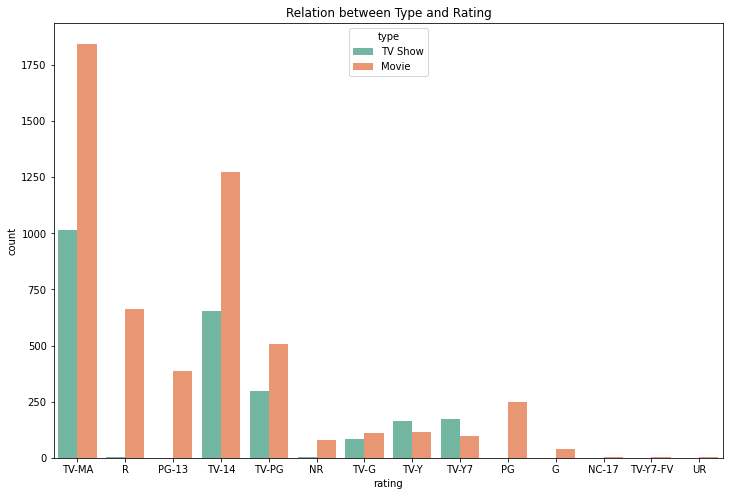

In [17]:
# graph for different rating on movies and tv shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df,palette="Set2")
plt.title('Relation between Type and Rating')
plt.show()

**Most of the Movies and tv shows have rating of TV-MA (Mature Audience), However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.**

##Content added each year

In [18]:
# Extracting month and year
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

In [19]:
df_year = df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
df_year

,year,count
0,2019,2153
1,2020,2009
2,2018,1684
3,2017,1222
4,2016,440
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11


In [20]:
df_year2 = df[['type','year_added']]
movie_year = df_year2[df_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

show_year = df_year2[df_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

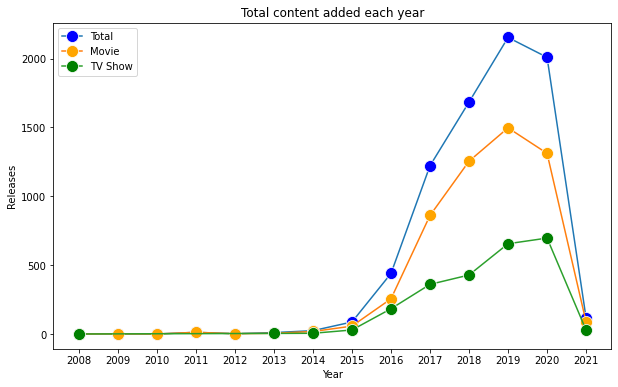

In [27]:
# line chart to see content add each year
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
sns.lineplot(data=movie_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
sns.lineplot(data=show_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'green', markersize = 12)
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

**Based on this graph, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous.

But after 2019, streaming platform going down. May be this due the world pandamic (covid_19).**

##Film Duration

In [22]:
# splitting movie and tv shows
df_movies = df[df['type']=='Movie'].copy()
df_show = df[df['type']=='Tv show'].copy()

In [23]:
# seprating values
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)
df_show.rename(columns={'duration':'seasons'}, inplace=True)
df_show.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
df_show.seasons = df_show.seasons.str.replace(' Seasons','').astype(int)

In [24]:
df_movies['year_added'] = pd.DatetimeIndex(df_movies['date_added']).year
df_show['year_added'] = pd.DatetimeIndex(df_show['date_added']).year

df_movies['month_added'] = pd.DatetimeIndex(df_movies['date_added']).month
df_show['month_added'] = pd.DatetimeIndex(df_show['date_added']).month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Duration (minutes)')

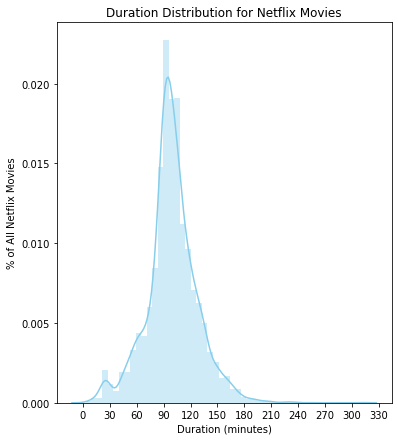

In [25]:
# ploting distplot for movies
g1 = sns.distplot(df_movies.duration, color='skyblue');
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")

##Countries with the most content available

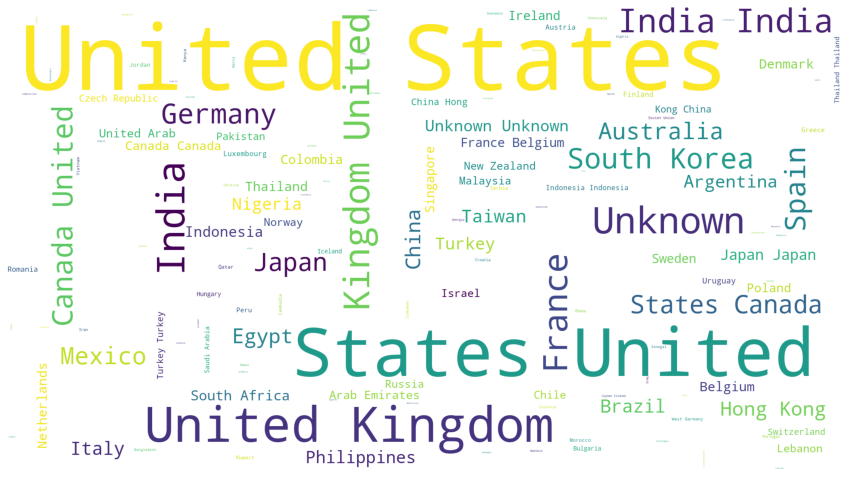

In [26]:
# importing word cloud
from wordcloud import WordCloud

# ploting cloud for country
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

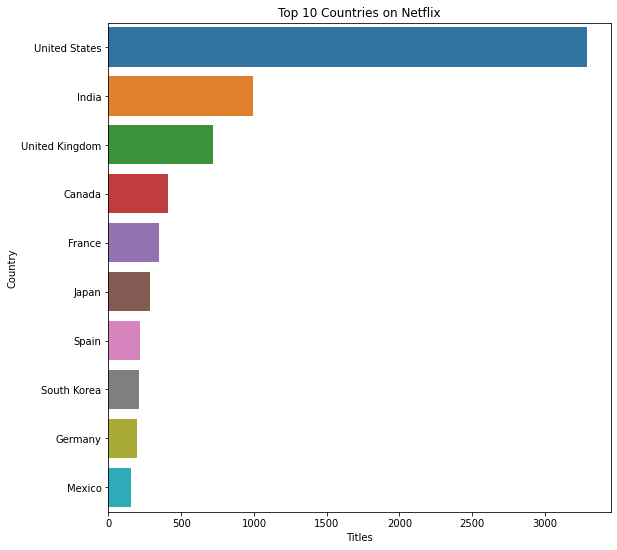

In [28]:
#seperating all countries and also not taking Unknown countries
ct = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
ct = ct[ct != 'Unknown']

# ploting countplot on top 10 countries on netflix
plt.figure(figsize=(9,9))
g = sns.countplot(y = ct, order=ct.value_counts().index[:10])
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

**So, As you can see that

The United States stands out on top since Netflix is an American company.

India comes in second followed by the UK and Canada.**

##Genres

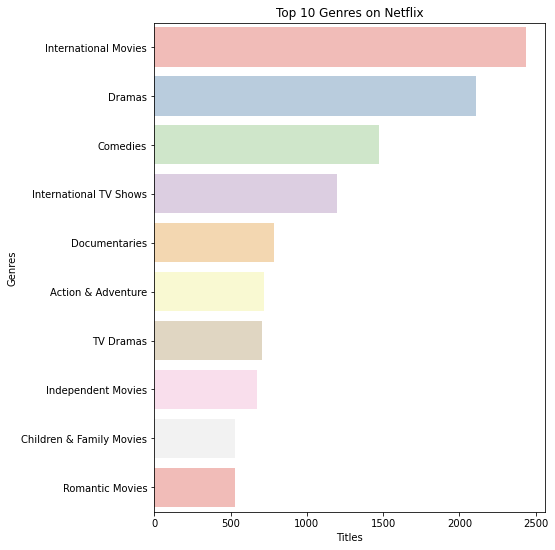

In [29]:
# Seprating Genres
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 10 genres
plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "Pastel1")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

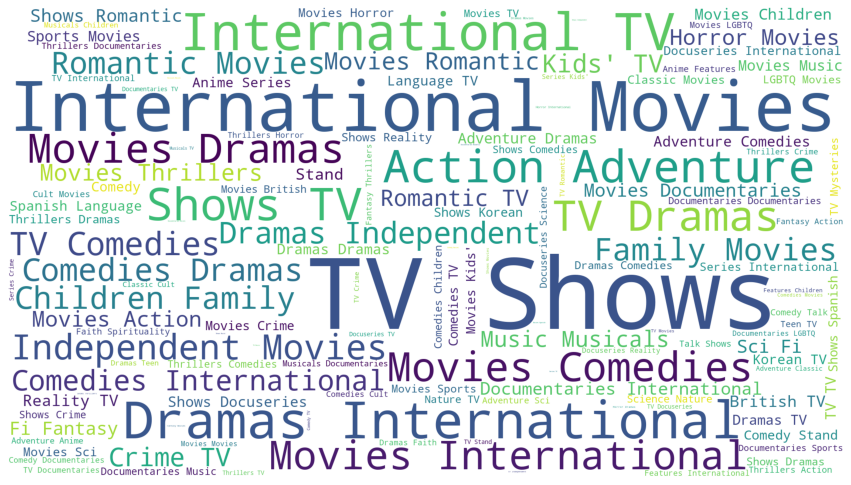

In [30]:
# genres cloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.**

##Top 10 directors on Netflix

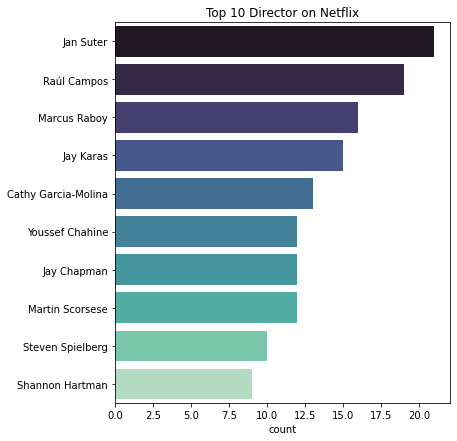

In [31]:
# Graph for top 10 directors
directors = df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='mako')
plt.title('Top 10 Director on Netflix')
plt.show()

**As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.**

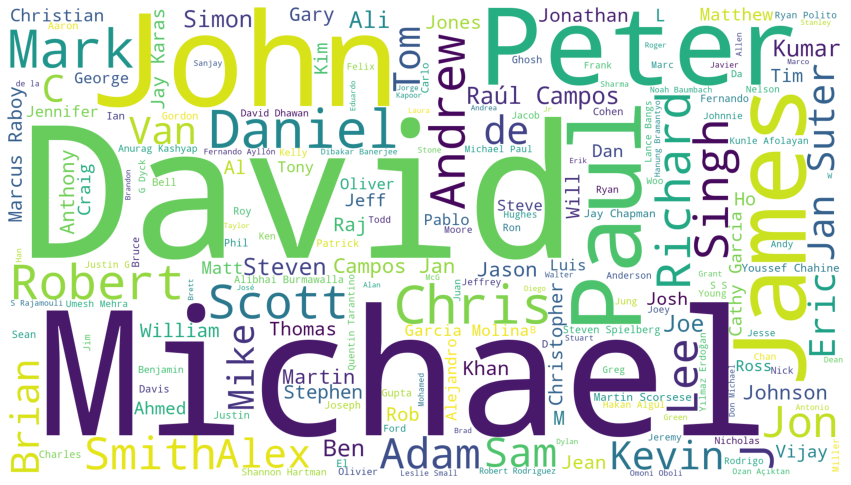

In [32]:
# Director cloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(directors))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()